In [ ]:
conda create -n stat -c conda-forge pandas scipy sсikit-learn ipykernel seaborn jupyterlab
#conda install packagename

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [44]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
type(iris_df)

pandas.core.frame.DataFrame

In [45]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
iris_df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

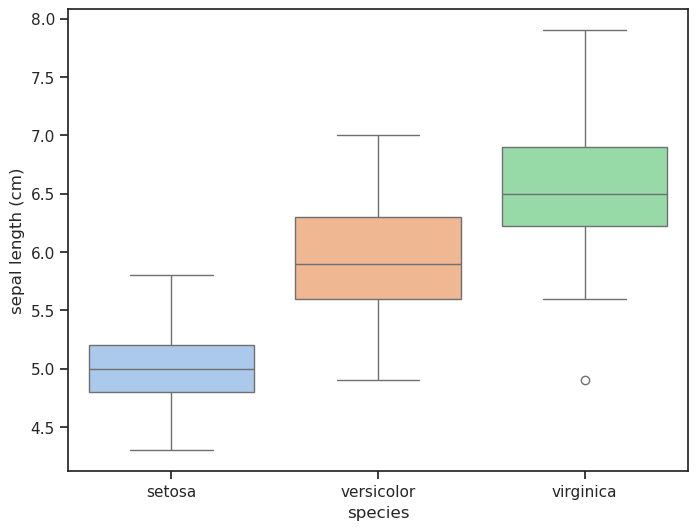

In [59]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = iris_df, x = "species", y = "sepal length (cm)",hue = "species", ax = ax)
fig.savefig("example1.png", dpi = 300)

<Axes: xlabel='species', ylabel='petal length (cm)'>

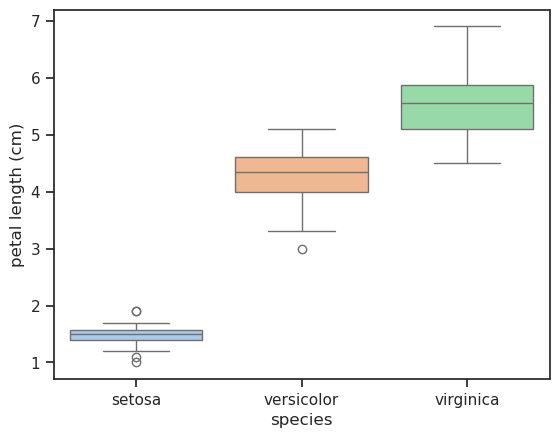

In [60]:
sns.boxplot(data = iris_df, x = "species", y = "petal length (cm)",hue = "species")


<Axes: xlabel='sepal length (cm)', ylabel='Count'>

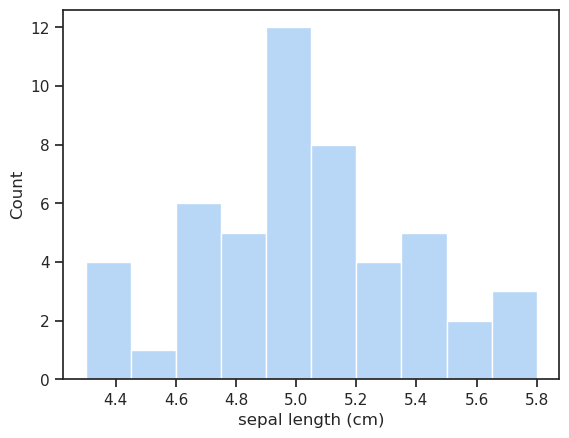

In [65]:
setosa = iris_df.loc[iris_df["species"] == "setosa"]
sns.histplot(data = setosa, x = "sepal length (cm)", bins = 10)

<Axes: xlabel='sepal length (cm)', ylabel='Count'>

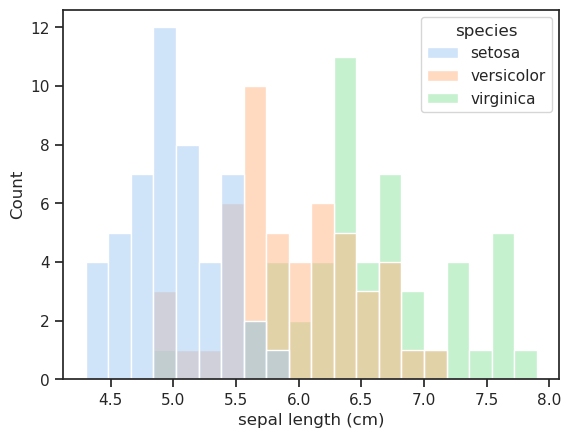

In [61]:
sns.histplot(data = iris_df, x = "sepal length (cm)", hue = "species",bins = 20)

In [57]:
res = stats.shapiro(setosa["sepal length (cm)"])
res

ShapiroResult(statistic=np.float64(0.977698549796646), pvalue=np.float64(0.4595131499174534))

In [66]:
res.pvalue

np.float64(0.4595131499174534)

In [67]:
res.statistic

np.float64(0.977698549796646)

In [70]:
species = iris_df["species"].unique()
parameters = iris_df.columns[0:-1]
pvalue = {}
for s in species:
    for p in parameters:
        df = iris_df.loc[iris_df["species"] == s, p]
        res = stats.shapiro(df)
        pvalue[f"{s}_{p}"] = res.pvalue
print(pvalue)

{'setosa_sepal length (cm)': np.float64(0.4595131499174534), 'setosa_sepal width (cm)': np.float64(0.27152639563455816), 'setosa_petal length (cm)': np.float64(0.0548114671955363), 'setosa_petal width (cm)': np.float64(8.658572739428681e-07), 'versicolor_sepal length (cm)': np.float64(0.4647370359250263), 'versicolor_sepal width (cm)': np.float64(0.3379951061741378), 'versicolor_petal length (cm)': np.float64(0.15847783815657573), 'versicolor_petal width (cm)': np.float64(0.027277803876105258), 'virginica_sepal length (cm)': np.float64(0.25831474614079086), 'virginica_sepal width (cm)': np.float64(0.18089604109069918), 'virginica_petal length (cm)': np.float64(0.10977536903223506), 'virginica_petal width (cm)': np.float64(0.0869541872909336)}


In [84]:
list(pvalue.keys())

['setosa_sepal length (cm)',
 'setosa_sepal width (cm)',
 'setosa_petal length (cm)',
 'setosa_petal width (cm)',
 'versicolor_sepal length (cm)',
 'versicolor_sepal width (cm)',
 'versicolor_petal length (cm)',
 'versicolor_petal width (cm)',
 'virginica_sepal length (cm)',
 'virginica_sepal width (cm)',
 'virginica_petal length (cm)',
 'virginica_petal width (cm)']

In [78]:
adj_res = stats.false_discovery_control(list(pvalue.values()))

print(adj_res)

[4.64737036e-01 3.62035194e-01 2.19245869e-01 1.03902873e-05
 4.64737036e-01 4.05594127e-01 3.10107499e-01 1.63666823e-01
 3.62035194e-01 3.10107499e-01 2.63460886e-01 2.60862562e-01]


In [86]:
adj_res.round(4)

array([0.4647, 0.362 , 0.2192, 0.    , 0.4647, 0.4056, 0.3101, 0.1637,
       0.362 , 0.3101, 0.2635, 0.2609])

<Axes: xlabel='petal width (cm)', ylabel='Count'>

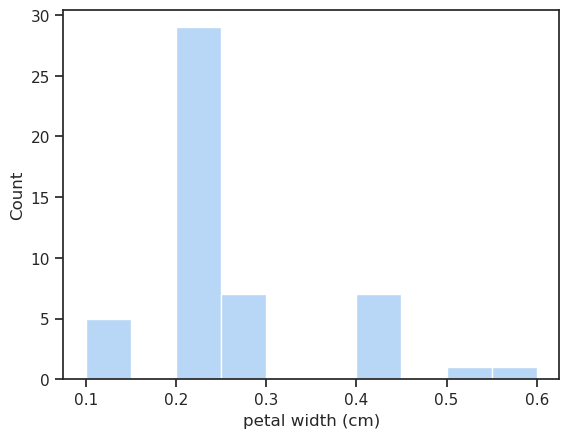

In [83]:
sns.histplot(data = setosa, x = "petal width (cm)", bins = 10)

In [87]:
setosa_sepal_length = iris_df.loc[iris_df["species"] == "setosa", "sepal length (cm)"]
versicolor_sepal_length = iris_df.loc[iris_df["species"] == "versicolor", "sepal length (cm)"]
stats.ttest_ind(setosa_sepal_length, versicolor_sepal_length)

TtestResult(statistic=np.float64(-10.52098626754911), pvalue=np.float64(8.985235037487079e-18), df=np.float64(98.0))